In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import data_utils as data_utils

dataset = pd.read_csv("datasets/dataset_clean.csv")

labels = dataset[['RIESGO_VIDA']]
features = dataset.drop(['RIESGO_VIDA'], axis = 1)

dataset.head()

C:\Users\mrugeles\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER_is_missing,AFEC_GETNICO_is_missing,AFEC_TIPOPER_is_missing,AFEC_EDADR_is_missing,PET_COD_DEPTO_is_missing,PATOLOGIA_TIPO_is_missing,AFEC_MPIO_is_missing,ENT_TIPOVIG_SNS_is_missing,AFEC_PARENTESCO_is_missing,PET_MPIO_is_missing
0,bogota d.c.,de 13 a 17 años,ninguno,mujer,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,0,0,0,0,0,0,0,0,0,0
1,valle,de 13 a 17 años,secundaria,hombre,no aplica,cali,abuelo (a),no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
2,huila,de 13 a 17 años,universitario incompleto,hombre,no aplica,neiva,padre,no aplica,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
3,risaralda,de 13 a 17 años,ninguno,hombre,no aplica,dosquebradas,padre,persona en condición de discapacidad,contributivo,natural,...,0,0,0,0,0,0,0,0,0,0
4,bogota d.c.,de 13 a 17 años,ninguno,hombre,no aplica,bogotá,otro,no aplica,subsidiado,natural,...,0,0,0,0,0,0,0,0,0,0


In [11]:

set(dataset['ENT_AMBITOIVC'].values)

{'999',
 999,
 'administradora de riesgos profesionales en actividades de salud',
 'asociaciones de usuarios',
 'direccion territorial de salud - departamental y/o distrital',
 'direccion territorial de salud - municipal',
 'entidades administradoras de planes de beneficios (eapb)',
 'entidades territoriales',
 'eps - conttributivo',
 'eps - subsidiado',
 'fondo de solidaridad y garantia (fosyga)',
 'fundaciones',
 'instituciones prestadoras de servicios de salud (ips)',
 'ips - privada',
 'ips - publica',
 'ministerio de la proteccion social',
 'ministerio de trabajo',
 'otros',
 'otros actores',
 'personeria',
 'presidencia de la republica',
 'procuraduria',
 'superintendencia industria y comercio'}

In [12]:
dataset = dataset.astype(str)
set(dataset['ENT_COD_DEPTO'].values)

{'11',
 '13',
 '15',
 '17',
 '18',
 '19',
 '20',
 '23',
 '25',
 '27',
 '41',
 '44',
 '47',
 '5',
 '50',
 '52',
 '54',
 '63',
 '66',
 '68',
 '70',
 '73',
 '76',
 '8',
 '81',
 '85',
 '86',
 '88',
 '91',
 '94',
 '95',
 '97',
 '99',
 '999'}

## Encoding dataset
All features in the dataset are categorical. Some of them have too many classes to be one hot encoded. Mean encoding transformation will be perform on the dataset to encode features.

In [13]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler


features_columns = [column for column in features.columns if '_is_missing' not in column]

le = preprocessing.LabelEncoder()
scaler = MinMaxScaler()

for column in features_columns:
    if(features[column].dtype == 'O'):
        features[column] = features[column].astype(str)
        le.fit(features[column])
        features[column] = le.transform(features[column])    
        features[column] = features[column].astype(int)
        features[column] = scaler.fit_transform(features[column].values.reshape(-1, 1))
        
features[features_columns] = features[features_columns].apply(lambda x: np.log(x + 1))      

features.head()


,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER_is_missing,AFEC_GETNICO_is_missing,AFEC_TIPOPER_is_missing,AFEC_EDADR_is_missing,PET_COD_DEPTO_is_missing,PATOLOGIA_TIPO_is_missing,AFEC_MPIO_is_missing,ENT_TIPOVIG_SNS_is_missing,AFEC_PARENTESCO_is_missing,PET_MPIO_is_missing
0,0.137201,0.200671,0.117783,0.693147,0.485508,0.094359,0.559616,0.405465,0.693147,0.693147,...,0,0,0,0,0,0,0,0,0,0
1,0.648027,0.200671,0.485508,0.405465,0.485508,0.121797,0.060625,0.405465,0.182322,0.693147,...,0,0,0,0,0,0,0,0,0,0
2,0.424883,0.200671,0.693147,0.405465,0.485508,0.434276,0.594707,0.405465,0.182322,0.693147,...,0,0,0,0,0,0,0,0,0,0
3,0.567984,0.200671,0.117783,0.405465,0.485508,0.230358,0.594707,0.485508,0.182322,0.693147,...,0,0,0,0,0,0,0,0,0,0
4,0.137201,0.200671,0.117783,0.405465,0.485508,0.094359,0.559616,0.405465,0.693147,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [14]:
features.describe()

,AFEC_DPTO,AFEC_EDADR,AFEC_EDUC,AFEC_GENERO,AFEC_GETNICO,AFEC_MPIO,AFEC_PARENTESCO,AFEC_POBESPECIAL,AFEC_REGAFILIACION,AFEC_TIPOPER,...,PET_TIPOPER_is_missing,AFEC_GETNICO_is_missing,AFEC_TIPOPER_is_missing,AFEC_EDADR_is_missing,PET_COD_DEPTO_is_missing,PATOLOGIA_TIPO_is_missing,AFEC_MPIO_is_missing,ENT_TIPOVIG_SNS_is_missing,AFEC_PARENTESCO_is_missing,PET_MPIO_is_missing
count,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,...,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000,281311.000000
mean,0.289159,0.516253,0.309794,0.562631,0.433357,0.263391,0.458223,0.364095,0.345874,0.683595,...,0.000078,0.095396,0.012797,0.015225,0.003669,0.000405,0.049252,0.022466,0.013270,0.003669
std,0.224955,0.176857,0.206127,0.157444,0.146922,0.198434,0.119965,0.128380,0.236259,0.079079,...,0.008843,0.293762,0.112399,0.122448,0.060457,0.020127,0.216393,0.148194,0.114429,0.060457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111226,0.441833,0.117783,0.405465,0.485508,0.094359,0.362905,0.405465,0.182322,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.137201,0.575364,0.318454,0.693147,0.485508,0.177887,0.523248,0.405465,0.182322,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.534082,0.693147,0.485508,0.693147,0.485508,0.413744,0.523248,0.405465,0.693147,0.693147,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Store processed dataset

In [15]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

features['RIESGO_VIDA'] = labels

features.to_csv("datasets/encoded_dataset.csv", index = False)

## Post Processing Exploration

In [16]:
features.columns

Index(['AFEC_DPTO', 'AFEC_EDADR', 'AFEC_EDUC', 'AFEC_GENERO', 'AFEC_GETNICO',
       'AFEC_MPIO', 'AFEC_PARENTESCO', 'AFEC_POBESPECIAL',
       'AFEC_REGAFILIACION', 'AFEC_TIPOPER', 'CIE_10', 'COD_MACROMOT',
       'COD_MOTESP', 'COD_MOTGEN', 'ENT_AMBITOIVC', 'ENT_COD_DEPTO',
       'ENT_COD_MPIO', 'ENT_COD_SNS', 'ENT_MPIO_DANE', 'ENT_NOMBRE',
       'ENT_TIPOVIG', 'ENT_TIPOVIG_SNS', 'IDPATOLOGIA_2', 'MES', 'PATOLOGIA_1',
       'PATOLOGIA_TIPO', 'PET_COD_DEPTO', 'PET_MPIO', 'PET_TIPOPER',
       'PQR_CANAL', 'PQR_CLASE_SNS', 'PQR_TIPOPETICION', 'TRIM',
       'AFEC_GENERO_is_missing', 'ENT_TIPOVIG_is_missing',
       'AFEC_EDUC_is_missing', 'ENT_NOMBRE_is_missing', 'AFEC_DPTO_is_missing',
       'AFEC_REGAFILIACION_is_missing', 'PATOLOGIA_1_is_missing',
       'ENT_COD_DEPTO_is_missing', 'AFEC_POBESPECIAL_is_missing',
       'ENT_COD_MPIO_is_missing', 'IDPATOLOGIA_2_is_missing',
       'ENT_COD_SNS_is_missing', 'ENT_AMBITOIVC_is_missing',
       'ENT_MPIO_DANE_is_missing', 'PET_TIPOPE

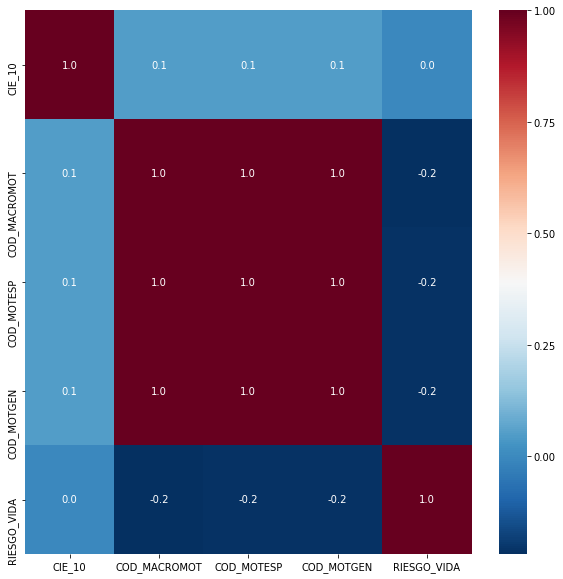

In [19]:
import seaborn as sns
plt.figure(figsize=(10, 10))

ax = sns.heatmap(features[['CIE_10', 'COD_MACROMOT', 'COD_MOTESP', 'COD_MOTGEN', 'RIESGO_VIDA']].corr(), cmap = "RdBu_r", annot=True, fmt='.1f')